In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/Users/abhaysharma/Downloads/compressed_data.csv', engine='python')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [9]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
df.drop(['house_rules','license'], axis =1, inplace=True)

In [13]:
df.dropna(subset=['NAME','host name'], inplace=True)

In [15]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0


In [17]:
df['last review']=pd.to_datetime(df['last review'], errors='coerce')

In [19]:
df.fillna({'reviews per month':0, 'last review':df['last review'].min()}, inplace=True)

In [21]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [17]:
df['price']=df['price'].replace('[\$,]','', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/z9/tfbwt6nj1374xj_z1_03cqp00000gn/T/ipykernel_13302/3137105450.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price']=df['price'].replace('[\$,]','', regex=True)


In [19]:
df['price']=df['price'].astype('float')

In [21]:
df['service fee']=df['service fee'].replace('[\$]','', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/z9/tfbwt6nj1374xj_z1_03cqp00000gn/T/ipykernel_13302/4071754837.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['service fee']=df['service fee'].replace('[\$]','', regex=True)


In [23]:
df['service fee']=df['service fee'].astype('float')

In [25]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0


# remove duplicates

In [27]:
df.drop_duplicates(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              101410 non-null  int64  
 1   NAME                            101410 non-null  object 
 2   host id                         101410 non-null  int64  
 3   host_identity_verified          101134 non-null  object 
 4   host name                       101410 non-null  object 
 5   neighbourhood group             101384 non-null  object 
 6   neighbourhood                   101394 non-null  object 
 7   lat                             101402 non-null  float64
 8   long                            101402 non-null  float64
 9   country                         100884 non-null  object 
 10  country code                    101288 non-null  object 
 11  instant_bookable                101314 non-null  object 
 12  cancellation_policy  

In [31]:
df.dropna(inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83412 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              83412 non-null  int64  
 1   NAME                            83412 non-null  object 
 2   host id                         83412 non-null  int64  
 3   host_identity_verified          83412 non-null  object 
 4   host name                       83412 non-null  object 
 5   neighbourhood group             83412 non-null  object 
 6   neighbourhood                   83412 non-null  object 
 7   lat                             83412 non-null  float64
 8   long                            83412 non-null  float64
 9   country                         83412 non-null  object 
 10  country code                    83412 non-null  object 
 11  instant_bookable                83412 non-null  object 
 12  cancellation_policy             8341

# Data Visualization

# Q1:- What is the disribution of listing price?


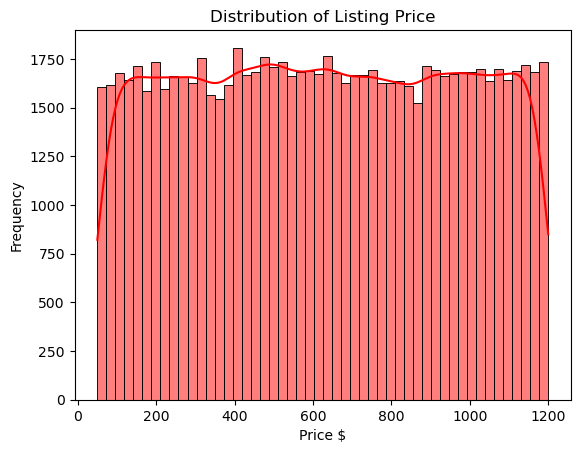

In [35]:
plt.Figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='red')
plt.title('Distribution of Listing Price')
plt.xlabel('Price $')
plt.ylabel('Frequency')
plt.show()

This histogram shows a fairly even distribution of listing price across the different price ranges, indicating no particular concentration of listings in any specific price range. The kde line helps visualize this even spread more clearly, confirming that the datasets contains listing with a wide variety of prices.

# Q2:- How are different room type distributed?

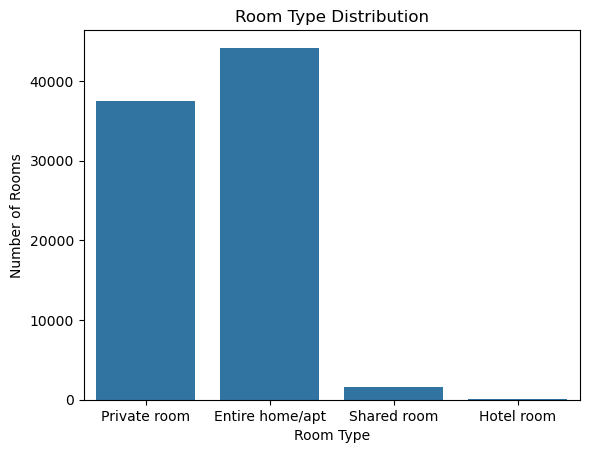

In [67]:
df['room type'].value_counts()
plt.Figure(figsize=(8,5))
sns.countplot(data=df, x='room type')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Rooms')
plt.show()

# Q3:- How are listings distributed across different neighbourhoods?

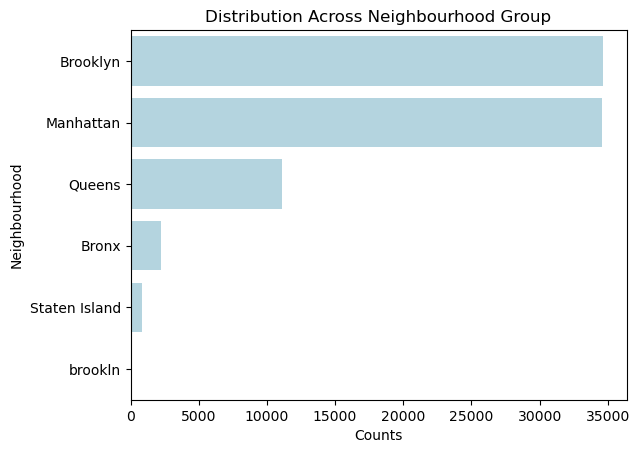

In [39]:
plt.Figure(figsize=(12,8))
sns.countplot(data=df, y='neighbourhood group', order=df['neighbourhood group'].value_counts().index, color='lightblue')
plt.title('Distribution Across Neighbourhood Group')
plt.ylabel('Neighbourhood')
plt.xlabel('Counts')
plt.show()

# Q4:- What is the relationship between price and room type?

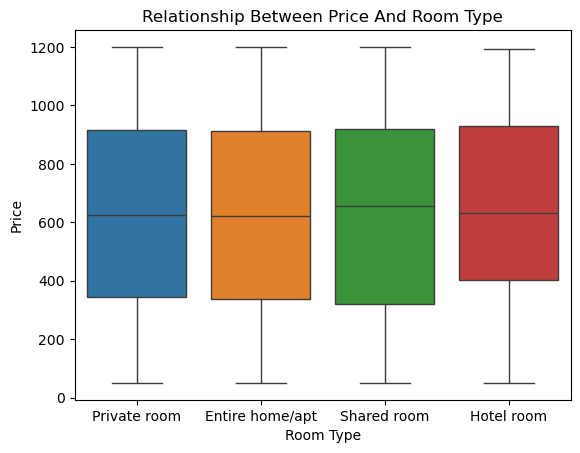

In [45]:
plt.Figure(figsize=(10,6))
sns.boxplot(x='room type',
           y='price',
            data=df,
            hue='room type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Relationship Between Price And Room Type')
plt.show()

# Q:- How has the number of review changed over with time?

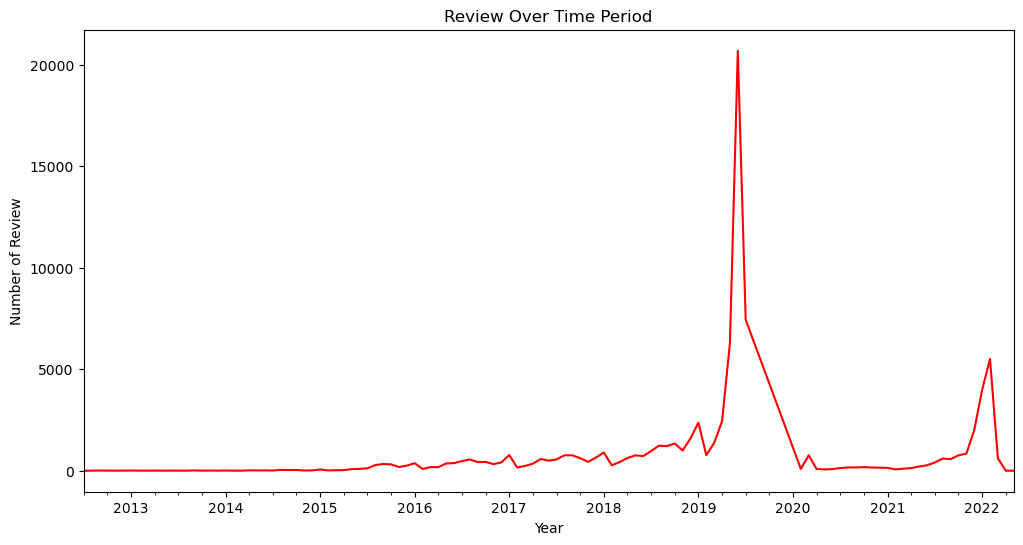

In [69]:
number_changed_review=df.groupby(df['last review'].dt.to_period('M')).size()
plt.figure(figsize=(12,6))
number_changed_review.plot(kind='line', color='red')
plt.title('Review Over Time Period')
plt.xlabel('Year')
plt.ylabel('Number of Review')
plt.show()